# Sprint 公開されている実装を動かす
## １．Faster R-CNN
Faster R-CNN[1]の実装を動かします。

[1]Ren, S., He, K., Girshick, R., Sun, J.: Faster r-cnn: Towards real-time object detection with region proposal networks. In: Advances in neural information processing systems. (2015) 91–99https://arxiv.org/pdf/1506.01497.pdf

以下のものを使用してください。Kerasを使用した実装です。 https://github.com/duckrabbits/ObjectDetection/tree/master

##【問題1】学習と推定
READMEを参考に上記実装を動かしてください。


### メモ : import argparse

###１．parserを作る　（description='この中はプログラムの説明'）
parser = argparse.ArgumentParser(formatter_class=argparse.RawTextHelpFormatter, description='Object Detection')
### ２．引数を設定する　'引数の名前','デフォルト値', help='この引数の説明（なくてもよい）'
parser.add_argument('--n_epochs', default=2000, type=int, metavar='N',
                    help='number of epochs')
#### 参考
https://qiita.com/kzkadc/items/e4fc7bc9c003de1eb6d0
            

### （１）データを準備

In [0]:
!pip install kaggle

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
%pwd

'/content'

In [0]:
#kaggleディレクトリの作成
mkdir .kaggle

In [0]:
ls -a

./  ../  .config/  drive/  .kaggle/  sample_data/


In [0]:
import json

token = {'username':'skmiya','key':'519950b8ff97535ab9911be9e2b8fffe'}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!chmod 600 /content/.kaggle/kaggle.json

In [0]:
!cp /content/.kaggle/kaggle.json /root/.kaggle/kaggle.json
# ここで大体エラーが出るので，先に↓↓のkaggleコマンドを実行する

In [0]:
#先にこっちを実行するとエラーになるので再度↑のコマンドを実行するといける．
# simpsonデータセットのAPIcommandを叩いてデータセットをダウンロードする
!kaggle datasets download -d alexattia/the-simpsons-characters-dataset

 99% 1.06G/1.08G [00:19<00:00, 69.0MB/s]
100% 1.08G/1.08G [00:19<00:00, 59.1MB/s]


In [0]:
# 解凍
!unzip /content/the-simpsons-characters-dataset.zip  -d Simpsons

In [0]:
# Faster R-CNNをクローン
!git clone https://github.com/duckrabbits/ObjectDetection.git

Cloning into 'ObjectDetection'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 28 (delta 4), reused 17 (delta 1), pack-reused 0
Unpacking objects: 100% (28/28), done.


### （２）ディレクトリ内の検索置換
公開されている実装とkerasのバージョンが合わないので，エラー個所を修正していく
https://qiita.com/kkyouhei/items/b4ff839a2f36ba194df3
* image_dim_ordering() → image_data_format()
* 'tf' → 'channels_last'

In [0]:
#Object Detectionの中のmodelへ移動
%cd ObjectDetection/model/

/content/ObjectDetection/model


In [0]:
#ディレクトリ内を検索置換
#grep -l '置換対象の文字列' ./* | xargs sed -i.bak -e 's/置換対象の文字列/置換後の文字列/g'
#model内を検索置換
!grep -l 'image_dim_ordering()' ./* | xargs sed -i.bak -e 's/image_dim_ordering()/image_data_format()/g'
!grep -l "'tf'" ./* | xargs sed -i.bak -e "s/'tf'/'channels_last'/g"

In [0]:
%pwd

'/content/ObjectDetection/model'

In [0]:
#一つ上のディレクトリへ戻る
%cd ..

/content/ObjectDetection


In [0]:
#一個上のObjectDetction内を検索置換
!grep -l 'image_dim_ordering()' ./* | xargs sed -i.bak -e 's/image_dim_ordering()/image_data_format()/g'
!grep -l "'tf'" ./* | xargs sed -i.bak -e "s/'tf'/'channels_last'/g"

grep: ./model: Is a directory
grep: ./model: Is a directory


### （３）学習

In [0]:
#ObjectDetectionへ移動（osを使うバージョン）
import os
os.chdir('/content/ObjectDetection')
print(os.getcwd())

/content/ObjectDetection


In [0]:
# simpsons_datasetを実行するディレクトリ（ObjectDetection）へ動かす
!mv /content/Simpsons/simpsons_dataset /content/ObjectDetection

In [0]:
#学習
!python train.py -p annotation.txt --n_epochs 30 --n_iters 100

Using TensorFlow backend.
Parsing annotation files
Training images per class (19 classes) :
{'abraham_grampa_simpson': 687,
 'apu_nahasapeemapetilon': 206,
 'bart_simpson': 650,
 'bg': 0,
 'charles_montgomery_burns': 650,
 'chief_wiggum': 209,
 'comic_book_guy': 208,
 'edna_krabappel': 212,
 'homer_simpson': 718,
 'kent_brockman': 213,
 'krusty_the_clown': 429,
 'lisa_simpson': 756,
 'marge_simpson': 629,
 'milhouse_van_houten': 210,
 'moe_szyslak': 403,
 'ned_flanders': 675,
 'nelson_muntz': 219,
 'principal_skinner': 614,
 'sideshow_bob': 201}
-------------------------------
path to config file : ./save/train_20191003-155706_config.pickle
-------------------------------









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/30
2019-10-03 15:57:26.727378: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2019-10-03 15:57:26.730103: I tensorflow/compiler/xla/service/service.cc:168] XLA service 

In [0]:
pwd

'/content/ObjectDetection'

In [0]:
%cd /content/ObjectDetection

/content/ObjectDetection


### （４）推定

In [0]:
!python predict.py -i /content/Simpsons/kaggle_simpson_testset/kaggle_simpson_testset -c /content/ObjectDetection/save/train_20191003-155706_config.pickle

Using TensorFlow backend.








2019-10-03 16:33:17.733137: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2019-10-03 16:33:17.733537: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x890bd40 executing computations on platform Host. Devices:
2019-10-03 16:33:17.733574: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2019-10-03 16:33:17.735565: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2019-10-03 16:33:17.807599: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-10-03 16:33:17.808417: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x8655f80 executing computations on platform CUDA. Devices:
2019-10-03 16:33:17.808488: I tensorflow/compiler/xla/ser

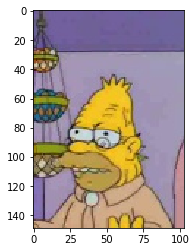

In [0]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#画像の読み込み
im = Image.open('/content/ObjectDetection/output/result_abraham_grampa_simpson_0.jpg.png')
#画像をarrayに変換
im_list = np.asarray(im)
#貼り付け
plt.imshow(im_list)
#表示
plt.show()

アノテーションされていない．．．

##【問題2】論文と実装の対応
コードリーディングを行ってください。

まず、Faster R-CNN[1]において重要だと考えた部分を列挙してください。そして、それに対応するコードを見つけてください。

（例）

* RPNを実現しているコードはどこか
* RoIプーリングを実現しているコードはどこか                
         
フレームワークには畳み込み層など一般的なものはクラスが用意されていますが、RoIプーリングなど特定の手法限定のものは用意されていません。オリジナルのレイヤーを作成することが可能であり、Kerasであれば以下のページに情報がまとまっています。
オリジナルのKerasレイヤーを作成する - Keras Documentation https://keras.io/ja/layers/writing-your-own-keras-layers/

###《参考》

KerasではVGG16のクラスが用意されているため、簡単に利用ができます。include_top=Falseの引数を与えることで、出力のための全結合層部分が除かれます。weights='imagenet'でImageNetを利用した学習済みモデルも手に入り、転移学習 が行えます。weights='None'とすればランダムな初期化となります。

Applications - Keras Documentation https://keras.io/ja/applications/#vgg16


### （１）RPNを実現しているコードはどこか
RPN：物体領域予測を行っている           

train.pyより

In [0]:
def main():
  """train.py内の学習を行うmainプログラム"""
  args = parser.parse_args()
  time_stamp = "{0:%Y%m%d-%H%M%S}".format(datetime.now())
  save_name = os.path.join(args.save_dir, "train_{}".format(time_stamp))
  ###中略###
  model_rpn, model_classifier, model_all = faster_rcnn.get_model(C, classes_count)
  #ここでmodelディレクトリ内のfaster_rcnn.pyから，model_rpnを受け取っている

modelディレクトリ内のfaster_rcnn.pyより

In [0]:
from model import resnet as nn

def get_model(C, classes_count):
    img_input = Input(shape=(None, None, 3))
    roi_input = Input(shape=(C.num_rois, 4))

    # define the base network (resnet here)
    shared_layers = nn.nn_base(img_input, trainable=True)

    # define the RPN, built on the base layers
    num_anchors = len(C.anchor_box_scales) * len(C.anchor_box_ratios)
    rpn = nn.rpn(shared_layers, num_anchors)
    #ここで，modelディレクトリ内のresnet.pyからrpnを受け取っている

modelディレクトリ内のresnet.pyより

In [0]:
def rpn(base_layers,num_anchors):
  """ここでRPNを構築している"""
  
  x = Convolution2D(512, (3, 3), padding='same', activation='relu', kernel_initializer='normal', name='rpn_conv1')(base_layers)

  x_class = Convolution2D(num_anchors, (1, 1), activation='sigmoid', kernel_initializer='uniform', name='rpn_out_class')(x)
  x_regr = Convolution2D(num_anchors * 4, (1, 1), activation='linear', kernel_initializer='zero', name='rpn_out_regress')(x)

  return [x_class, x_regr, base_layers]

### （２）RoIプーリングを実現しているコードはどこか
ROIプーリング : RPNで抽出された物体領域ごとのバラバラのサイズの特徴マップを同じサイズにする                   
modelディレクトリ内のRoiPoolingConv.pyより


In [0]:
class RoiPoolingConv(Layer):
    def __init__(self, pool_size, num_rois, **kwargs):

        self.dim_ordering = K.image_dim_ordering()
        assert self.dim_ordering in {'tf', 'th'}, 'dim_ordering must be in {tf, th}'

        self.pool_size = pool_size
        self.num_rois = num_rois

        super(RoiPoolingConv, self).__init__(**kwargs)

    def build(self, input_shape):
        if self.dim_ordering == 'th':
            self.nb_channels = input_shape[0][1]
        elif self.dim_ordering == 'tf':
            self.nb_channels = input_shape[0][3]

    def compute_output_shape(self, input_shape):
        if self.dim_ordering == 'th':
            return None, self.num_rois, self.nb_channels, self.pool_size, self.pool_size
        else:
            return None, self.num_rois, self.pool_size, self.pool_size, self.nb_channels

    def call(self, x, mask=None):

        assert(len(x) == 2)

        img = x[0]
        rois = x[1]

        input_shape = K.shape(img)

        outputs = []

        for roi_idx in range(self.num_rois):

            x = rois[0, roi_idx, 0]
            y = rois[0, roi_idx, 1]
            w = rois[0, roi_idx, 2]
            h = rois[0, roi_idx, 3]
            
            row_length = w / float(self.pool_size)
            col_length = h / float(self.pool_size)

            num_pool_regions = self.pool_size

            if self.dim_ordering == 'th':
                for jy in range(num_pool_regions):
                    for ix in range(num_pool_regions):
                        x1 = x + ix * row_length
                        x2 = x1 + row_length
                        y1 = y + jy * col_length
                        y2 = y1 + col_length

                        x1 = K.cast(x1, 'int32')
                        x2 = K.cast(x2, 'int32')
                        y1 = K.cast(y1, 'int32')
                        y2 = K.cast(y2, 'int32')

                        x2 = x1 + K.maximum(1,x2-x1)
                        y2 = y1 + K.maximum(1,y2-y1)
                        
                        new_shape = [input_shape[0], input_shape[1],
                                     y2 - y1, x2 - x1]

                        x_crop = img[:, :, y1:y2, x1:x2]
                        xm = K.reshape(x_crop, new_shape)
                        pooled_val = K.max(xm, axis=(2, 3))
                        outputs.append(pooled_val)

            elif self.dim_ordering == 'tf':
                x = K.cast(x, 'int32')
                y = K.cast(y, 'int32')
                w = K.cast(w, 'int32')
                h = K.cast(h, 'int32')

                rs = tf.image.resize_images(img[:, y:y+h, x:x+w, :], (self.pool_size, self.pool_size))
                outputs.append(rs)
        #このあたりで，RPNから受け取った特徴マップをアウトプットshapeにreshape"""
        final_output = K.concatenate(outputs, axis=0)
        final_output = K.reshape(final_output, (1, self.num_rois, self.pool_size, self.pool_size, self.nb_channels))

        if self.dim_ordering == 'th':
            final_output = K.permute_dimensions(final_output, (0, 1, 4, 2, 3))
        else:
            final_output = K.permute_dimensions(final_output, (0, 1, 2, 3, 4))

        return final_output
      
      # このクラスはmodelディレクトリ内のresnet.pyのclassifierメソッドにて呼び出される

modelディレクトリ内のresnet.pyより

In [0]:
def classifier(base_layers, input_rois, num_rois, nb_classes = 21, trainable=False):

    pooling_regions = 14
    input_shape = (num_rois,14,14,1024)
    out_roi_pool = RoiPoolingConv(pooling_regions, num_rois)([base_layers, input_rois])
    out = classifier_layers(out_roi_pool, input_shape=input_shape, trainable=True)

# ３．YOLOv3
シンプソンズのデータセットをFaster R-CNN以外の手法で学習・推定を行います。YOLOvの[2]のKeras実装を使います。

https://github.com/qqwweee/keras-yolo3

[2]Jeseph Redmon, Ali Farhadi. YOLOv3: An Incremental Improvement

https://pjreddie.com/media/files/papers/YOLOv3.pdf
##【問題3】学習済みの重みによる推定
学習済みの重みを使い推定を行う方法がREADME.mdのQuick Startの項に記載されています。

まずはこの通りにして各自何かしらの画像や動画に対して検出を行ってください。

出力結果を課題の一部として提出してください。

In [0]:
%cd /content/

/content


In [0]:
# keras-YOLOをクローン
!git clone https://github.com/qqwweee/keras-yolo3.git

Cloning into 'keras-yolo3'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 150.95 KiB | 1.33 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [0]:
#keras-YOLOに移動
%cd /content/keras-yolo3

/content/keras-yolo3


In [0]:
# yolov3weightのダウンロード（学習済みの重み）
!wget https://pjreddie.com/media/files/yolov3.weights

--2019-10-03 17:00:25--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  6.40MB/s    in 27s     

2019-10-03 17:00:52 (8.92 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [0]:
#事前学習済みの重みをロード
!python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.


Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)



2019-10-03 17:00:55.349736: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2019-10-03 17:00:55.350043: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1cab480 executing computations on platform Host. Devices:
2019-10-03 17:00:55.350077: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2019-10-03 17:00:55.351991: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2019-10-03 17:00:55.429318: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-10-03 17:00:55.430131: I

In [0]:
!python yolo_video.py --image 

Using TensorFlow backend.
Image detection mode
 Ignoring remaining command line arguments: ./path2your_video,



2019-10-03 17:04:04.233431: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2019-10-03 17:04:04.233720: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1e37480 executing computations on platform Host. Devices:
2019-10-03 17:04:04.233761: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2019-10-03 17:04:04.235823: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2019-10-03 17:04:04.311649: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-10-03 17:04:04.312428: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1e37d40 executing computations on pl

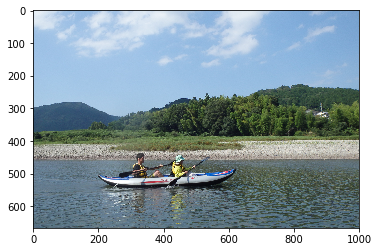

In [0]:
#input_image
im = Image.open('/content/keras-yolo3/7af616e3-f091-4206-8a1a-97e7fcf1dad3.jpg')
#画像をarrayに変換
im_list = np.asarray(im)
#貼り付け
plt.imshow(im_list)
#表示
plt.show()

人とボートをきちんと検知できていた


##【問題4】学習のためのファイルを作成
新しいデータ（シンプソンズデータセット）を学習します。README.mdのTrainingの項を読み、シンプソンズデータセットを学習するために必要なファイルを作成してください。

アノテーションファイルの形式が問題1の実装とは異なるため変換する必要があります。                        
**《アノテーションファイルの形式》**                            
image_file_path,xmin,ymin,xmax,ymax,label


In [0]:
#simpsonの画像データをYOLOへ移動
!mv /content/Simpsons/simpsons_dataset/simpsons_dataset /content/keras-yolo3

In [0]:
#ObjectDetection内のアノテーションデータのコピー
import shutil
shutil.copyfile("/content/ObjectDetection/annotation.txt", "/content/keras-yolo3/annotation.txt")

'/content/keras-yolo3/annotation.txt'

In [0]:
%pwd

'/content/keras-yolo3'

In [0]:
import pandas as pd
#アノテーションデータの確認
annotation_df = pd.read_csv('annotation.txt',header=None)
n_sample, n_col = annotation_df.shape
print(n_sample,n_col)
annotation_df.head()

7889 6


,0,1,2,3,4,5
0,simpsons_dataset/abraham_grampa_simpson/pic_00...,57,72,52,72,abraham_grampa_simpson
1,simpsons_dataset/abraham_grampa_simpson/pic_00...,80,31,337,354,abraham_grampa_simpson
2,simpsons_dataset/abraham_grampa_simpson/pic_00...,128,48,285,407,abraham_grampa_simpson
3,simpsons_dataset/abraham_grampa_simpson/pic_00...,72,126,158,275,abraham_grampa_simpson
4,simpsons_dataset/abraham_grampa_simpson/pic_00...,123,61,294,416,abraham_grampa_simpson


In [0]:
#何人いるかなー
label = annotation_df.iloc[:,5].unique()
label,label.size

(array(['abraham_grampa_simpson', 'apu_nahasapeemapetilon', 'bart_simpson',
        'charles_montgomery_burns', 'chief_wiggum', 'comic_book_guy',
        'edna_krabappel', 'homer_simpson', 'kent_brockman',
        'krusty_the_clown', 'lisa_simpson', 'marge_simpson',
        'milhouse_van_houten', 'moe_szyslak', 'ned_flanders',
        'nelson_muntz', 'principal_skinner', 'sideshow_bob'], dtype=object),
 18)

### （１）クラスラベルをエンコードする

In [0]:
from sklearn.preprocessing import LabelEncoder
#LabelEncoderのインスタンスを生成
le = LabelEncoder()
#ラベルを覚えさせる
annotation_df.iloc[:,5] = le.fit_transform(annotation_df.iloc[:,5])
annotation_df.tail()

,0,1,2,3,4,5
7884,simpsons_dataset/moe_szyslak/pic_0160.jpg,21,9,69,75,13
7885,simpsons_dataset/moe_szyslak/pic_0033.jpg,89,8,126,74,13
7886,simpsons_dataset/moe_szyslak/pic_0337.jpg,66,75,196,245,13
7887,simpsons_dataset/moe_szyslak/pic_1067.jpg,159,44,287,247,13
7888,simpsons_dataset/moe_szyslak/pic_0928.jpg,185,64,396,329,13


### （２）image_pathを直す

In [0]:
%pwd

'/content/keras-yolo3'

In [0]:
# YOLO用のアノテーションファイルにする
# imagepath,xmin,y,min,xmax,ymax,classlabel
path = '/content/keras-yolo3/annotation.txt'
out_path = '/content/keras-yolo3/train.txt'

with open(path) as f:
  lines = f.readline() # 1行毎にファイル終端まで全て読む(改行文字も含まれる)
  for i in range(n_sample):
    split_line = lines.split(',')  #「，」で区切って配列にする．
    image_path = split_line[0]
    #split_line[0] = '/content/keras-yolo3/' + image_path
    split_line[0] = './' + image_path #file_pathの変更
    split_line[-1] = str(annotation_df.iloc[i,5]) + '\n'  #クラスラベルの変更

    #YOLO用のアノテーションファイルの作成
    with open(out_path, mode='a') as out_f:
      join_line = ','.join(split_line)  #「，」で区切られているところをくっつける
      join_line = join_line.replace('.jpg,','.jpg ')  #file_pathとbboxの間は空白区切り
      out_f.write(join_line)

### （３）クラスラベルのファイルを作成

In [0]:
#クラスラベルのファイルを作成
pd.Series(label).to_csv('/content/keras-yolo3/model_data/class_label.txt',index=False,header=False)

## 【問題5】学習が行えることの確認
問題4で作成したファイルを使用して学習してください。実行環境で学習に時間がかかる場合は、学習が行えることを確認するのみで終えて構いません。

In [0]:
# 事前学習済みの重みをロード
!python convert.py -w yolov3.cfg yolov3.weights model_data/yolo_weights.h5

In [0]:
%pwd

'/content/keras-yolo3'

In [0]:
!python train.py

Using TensorFlow backend.





2019-09-23 10:58:42.430012: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX512F
2019-09-23 10:58:42.433543: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2000175000 Hz
2019-09-23 10:58:42.433774: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1959480 executing computations on platform Host. Devices:
2019-09-23 10:58:42.433809: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2019-09-23 10:58:42.452063: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line fla

ちゃんと動いた．
# メモ：大きすぎるファイルを任意の行数で分ける

In [0]:
import os.path;

def file_line_reader_generator(file_path):
    """ファイルの行を返すジェネレータ"""
    with open(file_path, encoding="utf-8") as in_file:
        for line in in_file:
            yield line

def output_file_from_generator(output_file_path, file_line_generator, max_lines_per_file):
    """ 
    行ジェネレータから行を読み込んで行数がmax_lines_per_filesに達するまで
    output_file_pathファイルに出力する
    """
    is_line_left_break = False
    with open(output_file_path, mode="w", encoding="utf-8") as out_file:
        for i,line in enumerate(file_line_generator):
            out_file.write(line)
            if i + 1 >= max_lines_per_file:
                is_line_left_break = True
                break

    return is_line_left_break

def split_file(in_file_path, output_dir_path, max_lines_per_file):
    """ 
    in_file_pathのテキストファイルをmax_lines_per_file行ごとに分割して
    output_dir_pathに出力する
    """
    file_name = os.path.basename(in_file_path)
    in_file_name_parts = file_name.split(".")
    out_file_name_template = "{0}_%d.{1}".format(*in_file_name_parts)

    file_lines = file_line_reader_generator(in_file_path)

    is_line_left = True
    file_index = 1 
    while (is_line_left):
        output_file_path = os.path.join(output_dir_path, out_file_name_template % file_index)
        is_line_left = output_file_from_generator(output_file_path, file_lines, max_lines_per_file)
        file_index = file_index + 1 

In [0]:
#ファイルを分割する
in_file_path = "/content/keras-yolo3/annotation.txt"  #分割前のファイル
max_lines_per_file = 2000  #分割する数
output_dir_path = "/content/keras-yolo3/Annotation"  #分割後のファイルを入れるディレクトリ
split_file(in_file_path, output_dir_path, max_lines_per_file)